# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Flight mainly let down by ...
1,✅ Trip Verified | Another awful experience b...
2,"✅ Trip Verified | The service was rude, full..."
3,✅ Trip Verified | This flight was a joke. Th...
4,✅ Trip Verified | This time British Airways ...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [6]:
df["status"] = df["reviews"].str.split("|", expand=True)[0]
df

,reviews,status
0,✅ Trip Verified | Flight mainly let down by ...,✅ Trip Verified
1,✅ Trip Verified | Another awful experience b...,✅ Trip Verified
2,"✅ Trip Verified | The service was rude, full...",✅ Trip Verified
3,✅ Trip Verified | This flight was a joke. Th...,✅ Trip Verified
4,✅ Trip Verified | This time British Airways ...,✅ Trip Verified
...,...,...
995,✅ Trip Verified | Mahe to Stockholm via London...,✅ Trip Verified
996,✅ Trip Verified | Glasgow to Tampa via Gatwic...,✅ Trip Verified
997,Not Verified | Orlando to Gatwick. Travelling...,Not Verified
998,✅ Trip Verified | London to Abu Dhabi. This i...,✅ Trip Verified


In [7]:
df["customer_reviews"] = df["reviews"].str.split("|", expand=True)[1]
df

,reviews,status,customer_reviews
0,✅ Trip Verified | Flight mainly let down by ...,✅ Trip Verified,Flight mainly let down by a disagreeable fl...
1,✅ Trip Verified | Another awful experience b...,✅ Trip Verified,Another awful experience by British Airways...
2,"✅ Trip Verified | The service was rude, full...",✅ Trip Verified,"The service was rude, full of attitude to m..."
3,✅ Trip Verified | This flight was a joke. Th...,✅ Trip Verified,This flight was a joke. There was four peop...
4,✅ Trip Verified | This time British Airways ...,✅ Trip Verified,This time British Airways managed to get ev...
...,...,...,...
995,✅ Trip Verified | Mahe to Stockholm via London...,✅ Trip Verified,Mahe to Stockholm via London. Checked in onli...
996,✅ Trip Verified | Glasgow to Tampa via Gatwic...,✅ Trip Verified,Glasgow to Tampa via Gatwick. Early morning ...
997,Not Verified | Orlando to Gatwick. Travelling...,Not Verified,Orlando to Gatwick. Travelling home was extr...
998,✅ Trip Verified | London to Abu Dhabi. This i...,✅ Trip Verified,London to Abu Dhabi. This is the daytime fli...


In [8]:
df.drop(columns="reviews", inplace=True)
df

,status,customer_reviews
0,✅ Trip Verified,Flight mainly let down by a disagreeable fl...
1,✅ Trip Verified,Another awful experience by British Airways...
2,✅ Trip Verified,"The service was rude, full of attitude to m..."
3,✅ Trip Verified,This flight was a joke. There was four peop...
4,✅ Trip Verified,This time British Airways managed to get ev...
...,...,...
995,✅ Trip Verified,Mahe to Stockholm via London. Checked in onli...
996,✅ Trip Verified,Glasgow to Tampa via Gatwick. Early morning ...
997,Not Verified,Orlando to Gatwick. Travelling home was extr...
998,✅ Trip Verified,London to Abu Dhabi. This is the daytime fli...


In [9]:
df["status"].unique()

array(['✅ Trip Verified ', 'Not Verified ', 'cNot Verified '],
      dtype=object)

In [10]:
df["status"].replace({"cNot Verified ": "Not Verified", "Not Verified ": "Not Verified"}, inplace=True)
df["status"].replace({"✅ Trip Verified ": "Trip Verified"}, inplace=True)
df

C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_18188\1859051287.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["status"].replace({"cNot Verified ": "Not Verified", "Not Verified ": "Not Verified"}, inplace=True)


,status,customer_reviews
0,Trip Verified,Flight mainly let down by a disagreeable fl...
1,Trip Verified,Another awful experience by British Airways...
2,Trip Verified,"The service was rude, full of attitude to m..."
3,Trip Verified,This flight was a joke. There was four peop...
4,Trip Verified,This time British Airways managed to get ev...
...,...,...
995,Trip Verified,Mahe to Stockholm via London. Checked in onli...
996,Trip Verified,Glasgow to Tampa via Gatwick. Early morning ...
997,Not Verified,Orlando to Gatwick. Travelling home was extr...
998,Trip Verified,London to Abu Dhabi. This is the daytime fli...


In [11]:
df["status"].unique()

array(['Trip Verified', 'Not Verified'], dtype=object)

In [12]:
# Mask-out reviews from Verified Trips 
verified_trips = df[df["status"] == "Trip Verified"]
df2 = verified_trips
df2

,status,customer_reviews
0,Trip Verified,Flight mainly let down by a disagreeable fl...
1,Trip Verified,Another awful experience by British Airways...
2,Trip Verified,"The service was rude, full of attitude to m..."
3,Trip Verified,This flight was a joke. There was four peop...
4,Trip Verified,This time British Airways managed to get ev...
...,...,...
994,Trip Verified,Orlando to Gatwick. Terrible flight experien...
995,Trip Verified,Mahe to Stockholm via London. Checked in onli...
996,Trip Verified,Glasgow to Tampa via Gatwick. Early morning ...
998,Trip Verified,London to Abu Dhabi. This is the daytime fli...


In [13]:
reviews_list = df['customer_reviews'].values.tolist()
reviews_list[:3]

['   Flight mainly let down by a disagreeable flight attendant. No queue to check in at Cape Town - good. However checkin agent was unfamiliar with BA size and weight rules for sports bags so had to wait 10 minutes while phone calls were made -- annoying. Lounge was good. Gate service was excellent with organised queues. Seat was good (the new upgraded Club Suite). The zip broke off the amenity kit so it was unusable -- BA cutting corners too much here. Offered a cocktail service which came promptly and the drink was excellent. But no nuts! So I went off to the galley to ask for some nuts or a snack to go with it. I spoke to a male flight attendant who looked at me with utter distaste that I had the temerity to ask for nuts. The he said "where have you come from?". What a bizarre question. I said "seat 8E" to which he responded with a flick of his hand - "go ask her, she\'s serving you." I was stunned - I have not been treated that way in even the cheapest restaurants, let alone busine

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [15]:
example = df2['customer_reviews'][50]
print(example)

   Appalling service with failing defective fleet of A380 aircraft. Flown four times on this route or return and significant delays of 2 to 26 hours every time. BA56 boarded 6:20pm on 13 October. Flight cancelled for technical reasons. Six hours to return through customs and recover bag. No BA management at all at Johannesburg that night. Further four hours to organise a hotel and transfer with queues of 300 people to check in. Room eventually accessed 4:30am No attempt to re-schedule or assist - Pilot trying to announce process.


In [16]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Appalling',
 'service',
 'with',
 'failing',
 'defective',
 'fleet',
 'of',
 'A380',
 'aircraft',
 '.']

In [17]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Appalling', 'NNP'),
 ('service', 'NN'),
 ('with', 'IN'),
 ('failing', 'VBG'),
 ('defective', 'JJ'),
 ('fleet', 'NN'),
 ('of', 'IN'),
 ('A380', 'NNP'),
 ('aircraft', 'NN'),
 ('.', '.')]

In [18]:
entities = nltk.chunk.ne_chunk(tagged)
#entities.pprint()

## VADER Sentiment Scoring

In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [21]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [22]:
sia.polarity_scores(example)

{'neg': 0.157, 'neu': 0.824, 'pos': 0.019, 'compound': -0.9062}

In [23]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    text = row['customer_reviews']
    myid = row.name
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/743 [00:00<?, ?it/s]

In [24]:
vaders = pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
0,0.123,0.802,0.075,-0.8845
1,0.289,0.711,0.000,-0.8294
2,0.107,0.893,0.000,-0.4588
3,0.061,0.857,0.082,0.0000
4,0.000,0.767,0.233,0.9831
...,...,...,...,...
994,0.289,0.711,0.000,-0.9215
995,0.131,0.729,0.140,0.5234
996,0.043,0.810,0.148,0.9269
998,0.072,0.731,0.196,0.9020


In [25]:
df = vaders
df

,neg,neu,pos,compound
0,0.123,0.802,0.075,-0.8845
1,0.289,0.711,0.000,-0.8294
2,0.107,0.893,0.000,-0.4588
3,0.061,0.857,0.082,0.0000
4,0.000,0.767,0.233,0.9831
...,...,...,...,...
994,0.289,0.711,0.000,-0.9215
995,0.131,0.729,0.140,0.5234
996,0.043,0.810,0.148,0.9269
998,0.072,0.731,0.196,0.9020


In [26]:
def get_sentiment(row):
    if row['compound'] >= 0.5:
        return 'positive'
    elif -0.05 < row['compound'] < 0.05:
        return 'neutral'
    else:
        return 'negative'

# Apply function to each row and store results in a new column
df['sentiment_label'] = df.apply(get_sentiment, axis=1)

# Display the updated DataFrame
print(df)

       neg    neu    pos  compound sentiment_label
0    0.123  0.802  0.075   -0.8845        negative
1    0.289  0.711  0.000   -0.8294        negative
2    0.107  0.893  0.000   -0.4588        negative
3    0.061  0.857  0.082    0.0000         neutral
4    0.000  0.767  0.233    0.9831        positive
..     ...    ...    ...       ...             ...
994  0.289  0.711  0.000   -0.9215        negative
995  0.131  0.729  0.140    0.5234        positive
996  0.043  0.810  0.148    0.9269        positive
998  0.072  0.731  0.196    0.9020        positive
999  0.130  0.821  0.049   -0.7820        negative

[743 rows x 5 columns]


In [27]:
df["sentiment_label"].value_counts()

sentiment_label
negative    430
positive    297
neutral      16
Name: count, dtype: int64

## Plot VADER Results

<function matplotlib.pyplot.show(close=None, block=None)>

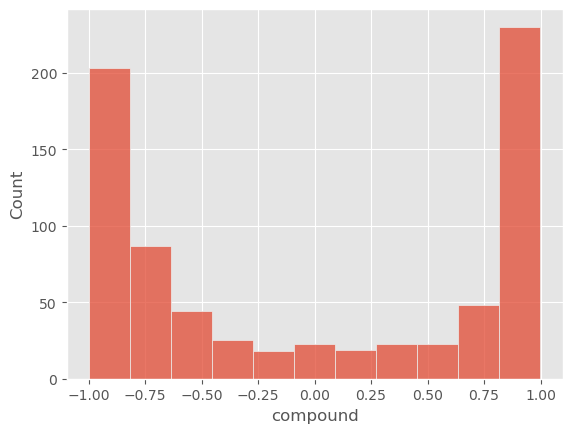

In [29]:
sns.histplot(vaders["compound"])
plt.show

C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_18188\43954048.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['green', 'gray', 'red'])


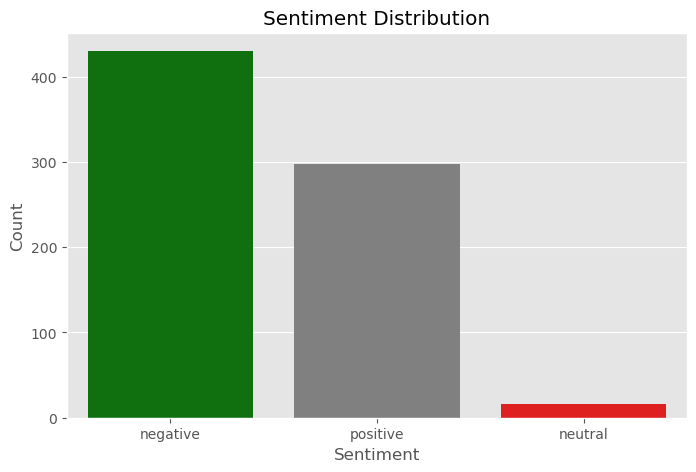

In [30]:
# Count occurrences of each sentiment category
sentiment_counts = df['sentiment_label'].value_counts()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.savefig("plot.png", dpi=300, bbox_inches='tight')
plt.show()



## Wordcloud Representation

In [73]:
verified_trips

,status,customer_reviews
0,Trip Verified,Flight mainly let down by a disagreeable fl...
1,Trip Verified,Another awful experience by British Airways...
2,Trip Verified,"The service was rude, full of attitude to m..."
3,Trip Verified,This flight was a joke. There was four peop...
4,Trip Verified,This time British Airways managed to get ev...
...,...,...
994,Trip Verified,Orlando to Gatwick. Terrible flight experien...
995,Trip Verified,Mahe to Stockholm via London. Checked in onli...
996,Trip Verified,Glasgow to Tampa via Gatwick. Early morning ...
998,Trip Verified,London to Abu Dhabi. This is the daytime fli...


In [79]:
review_vader = pd.concat([verified_trips, df], axis=1)
review_vader

,status,customer_reviews,neg,neu,pos,compound,sentiment_label
0,Trip Verified,Flight mainly let down by a disagreeable fl...,0.123,0.802,0.075,-0.8845,negative
1,Trip Verified,Another awful experience by British Airways...,0.289,0.711,0.000,-0.8294,negative
2,Trip Verified,"The service was rude, full of attitude to m...",0.107,0.893,0.000,-0.4588,negative
3,Trip Verified,This flight was a joke. There was four peop...,0.061,0.857,0.082,0.0000,neutral
4,Trip Verified,This time British Airways managed to get ev...,0.000,0.767,0.233,0.9831,positive
...,...,...,...,...,...,...,...
994,Trip Verified,Orlando to Gatwick. Terrible flight experien...,0.289,0.711,0.000,-0.9215,negative
995,Trip Verified,Mahe to Stockholm via London. Checked in onli...,0.131,0.729,0.140,0.5234,positive
996,Trip Verified,Glasgow to Tampa via Gatwick. Early morning ...,0.043,0.810,0.148,0.9269,positive
998,Trip Verified,London to Abu Dhabi. This is the daytime fli...,0.072,0.731,0.196,0.9020,positive


In [85]:
neg_rev = review_vader[review_vader["sentiment_label"] == "negative"]
neg_rev

,status,customer_reviews,neg,neu,pos,compound,sentiment_label
0,Trip Verified,Flight mainly let down by a disagreeable fl...,0.123,0.802,0.075,-0.8845,negative
1,Trip Verified,Another awful experience by British Airways...,0.289,0.711,0.000,-0.8294,negative
2,Trip Verified,"The service was rude, full of attitude to m...",0.107,0.893,0.000,-0.4588,negative
7,Trip Verified,Prior to boarding a gate agent seemed to pi...,0.082,0.885,0.033,-0.9026,negative
8,Trip Verified,I flew from Amsterdam to Las Vegas with a l...,0.049,0.927,0.024,-0.8095,negative
...,...,...,...,...,...,...,...
989,Trip Verified,Gatwick to Seville. When my son and his girl...,0.123,0.774,0.103,0.2023,negative
990,Trip Verified,"London to Abuja-flight full, aircraft an olde...",0.091,0.843,0.066,-0.4497,negative
991,Trip Verified,London to Bangkok. What an awful plane. Seat...,0.175,0.739,0.086,-0.8800,negative
994,Trip Verified,Orlando to Gatwick. Terrible flight experien...,0.289,0.711,0.000,-0.9215,negative


In [87]:
pos_rev = review_vader[review_vader["sentiment_label"] == "positive"]
pos_rev

,status,customer_reviews,neg,neu,pos,compound,sentiment_label
4,Trip Verified,This time British Airways managed to get ev...,0.000,0.767,0.233,0.9831,positive
5,Trip Verified,"The seats were excellent, with a feel of mu...",0.000,0.908,0.092,0.7703,positive
6,Trip Verified,After the nightmare of getting through trip...,0.070,0.751,0.179,0.9428,positive
9,Trip Verified,"First the good news, the club suites are such...",0.066,0.783,0.151,0.8923,positive
10,Trip Verified,I have never travelled with British airways...,0.058,0.583,0.358,0.9950,positive
...,...,...,...,...,...,...,...
992,Trip Verified,Belfast to San Francisco via London. Check-i...,0.075,0.749,0.176,0.9316,positive
993,Trip Verified,London to Gothenburg. BA are getting a lot o...,0.073,0.793,0.134,0.7501,positive
995,Trip Verified,Mahe to Stockholm via London. Checked in onli...,0.131,0.729,0.140,0.5234,positive
996,Trip Verified,Glasgow to Tampa via Gatwick. Early morning ...,0.043,0.810,0.148,0.9269,positive


### Positive Wordcloud

In [75]:
# First, to clean the data
import re
from wordcloud import STOPWORDS

text = ' '.join(pos_rev['customer_reviews'].astype(str).tolist())

text = re.sub(r'[^A-Za-z\s]', '', text)

text = text.lower()

stopwords = set(STOPWORDS)
text = ' '.join(word for word in text.split() if word not in stopwords)


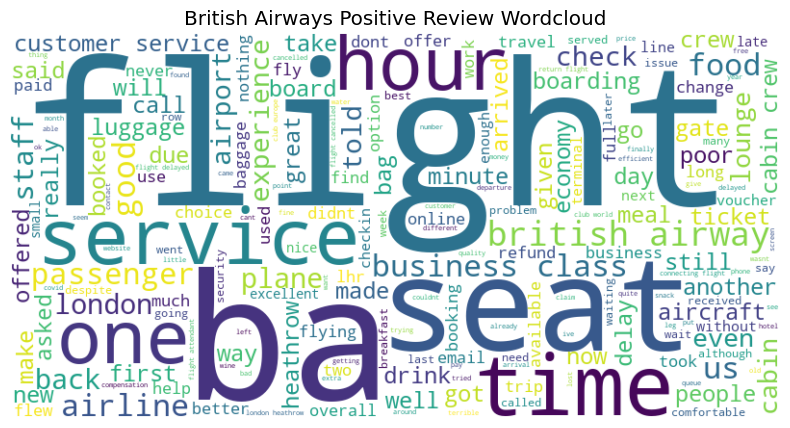

In [90]:
# Generate the wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("British Airways Positive Review Wordcloud")
plt.show()

### Negative Review Wordcloud

In [93]:
# First, to clean the data
import re
from wordcloud import STOPWORDS

text = ' '.join(neg_rev['customer_reviews'].astype(str).tolist())

text = re.sub(r'[^A-Za-z\s]', '', text)

text = text.lower()

stopwords = set(STOPWORDS)
text = ' '.join(word for word in text.split() if word not in stopwords)


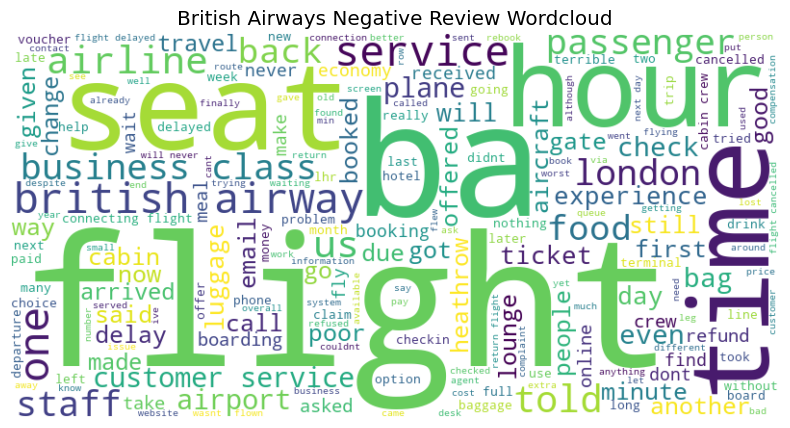

In [97]:
# Generate the wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("British Airways Negative Review Wordcloud")
plt.show()

In [31]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [32]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [33]:
print(example)
sia.polarity_scores(example)

   Appalling service with failing defective fleet of A380 aircraft. Flown four times on this route or return and significant delays of 2 to 26 hours every time. BA56 boarded 6:20pm on 13 October. Flight cancelled for technical reasons. Six hours to return through customs and recover bag. No BA management at all at Johannesburg that night. Further four hours to organise a hotel and transfer with queues of 300 people to check in. Room eventually accessed 4:30am No attempt to re-schedule or assist - Pilot trying to announce process.


{'neg': 0.157, 'neu': 0.824, 'pos': 0.019, 'compound': -0.9062}